In [1]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame()

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df


,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

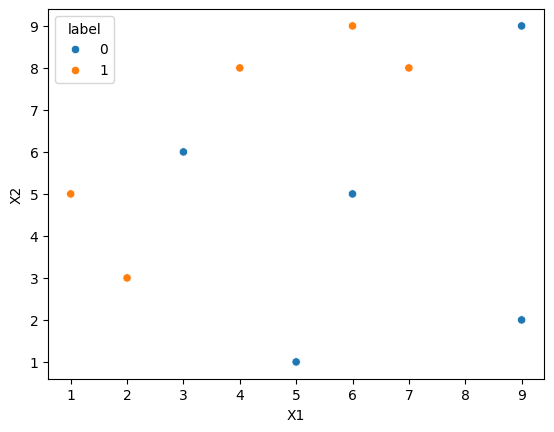

In [5]:
import seaborn as sns
sns.scatterplot(data=df,x='X1',y='X2',hue='label')


In [6]:
df['weights']  = 1/df.shape[0]

In [7]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [10]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [11]:

# Step 2 - Train 1st model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

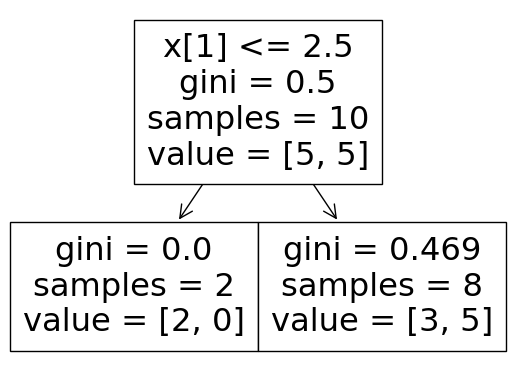

In [12]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

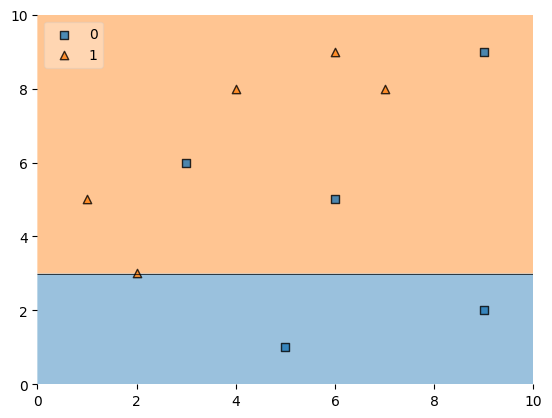

In [13]:
plot_decision_regions(X,y,dt1,legend=2)

In [14]:
df['y_pred'] = dt1.predict(X)

In [15]:
df


,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [16]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/error)

In [17]:

# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)


In [18]:
alpha1

0.42364893019360184

In [19]:
#step 4  -  Update weights

def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [20]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)


In [21]:
df


,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [22]:

df['updated_weights'].sum()
# -->1


0.9165153319682015

In [23]:
df


,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [24]:

df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [25]:
df


,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [28]:
df['nomalized_weights'].sum()

1.0

In [27]:

df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

In [29]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

In [30]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [39]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [40]:

index_values = create_new_dataset(df)

index_values

[8, 3, 8, 2, 3, 3, 4, 9, 7, 4]

In [41]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [42]:

second_df

,X1,X2,label,weights
8,9,9,0,0.1
3,4,8,1,0.1
8,9,9,0,0.1
2,3,6,0,0.1
3,4,8,1,0.1
3,4,8,1,0.1
4,5,1,0,0.1
9,9,2,0,0.1
7,7,8,1,0.1
4,5,1,0,0.1


In [43]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [44]:

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [45]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.25, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]')]

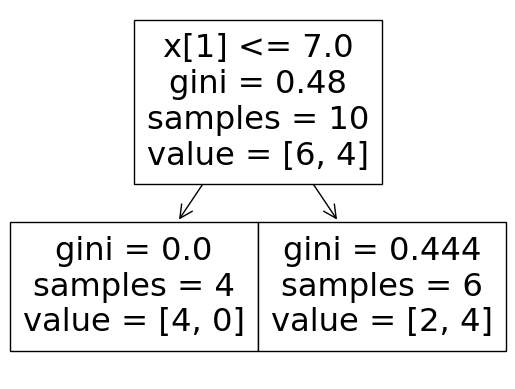

In [46]:
plot_tree(dt2)


<Axes: >

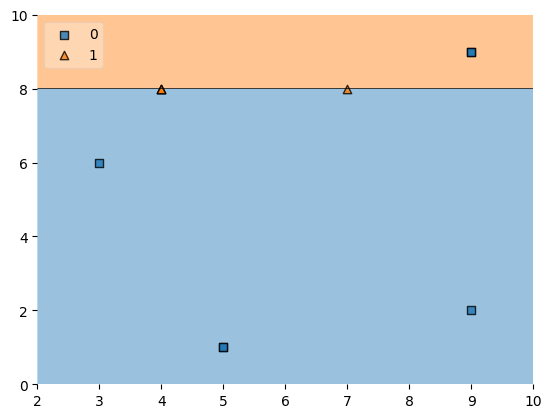

In [47]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [48]:

second_df['y_pred'] = dt2.predict(X)

In [49]:
second_df

,X1,X2,label,weights,y_pred
8,9,9,0,0.1,1
3,4,8,1,0.1,1
8,9,9,0,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
9,9,2,0,0.1,0
7,7,8,1,0.1,1
4,5,1,0,0.1,0


In [50]:

alpha2 = calculate_model_weight(0.1)


In [51]:
alpha2

1.0986122886681098